# Homework 3

Please submit the solution to gradescope by 11:59 PM, Oct 10, Thursday.

**Name**: Robert Nachnani

**PID**: 730573785


In [118]:
from datetime import datetime
from bs4 import BeautifulSoup
from io import StringIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# 1. DataFrame with MultiIndex (12 points)

You are given the following MultiIndexed DataFrame temperature_data which contains monthly average temperatures (in °C) for different cities over two years. 

- 1.1. Display the temperature data for the year 2019.
- 1.2. Display the temperature data for 'New York' city across all years.
- 1.3. Display the temperature data for the month of 'Jan' across all cities and years.
- 1.4. Display temperature data for 'Los Angeles' city for the year 2020.
- 1.5. Display the temperature data for the 'Chicago' and 'Houston' cities for the month of 'Feb' in the year 2019.
- 1.6. Display the temperature data for the months 'Mar' and 'Apr' for all cities in the year 2020.

In [119]:
index = pd.MultiIndex.from_product(
    [['2019', '2020'], ['New York', 'Los Angeles', 'Chicago', 'Houston'], ['Jan', 'Feb', 'Mar', 'Apr']],
    names=['Year', 'City', 'Month']
)

np.random.seed(42)
data = np.random.uniform(-10, 35, size=(32, 1))

temperature_data = pd.DataFrame(data, index=index, columns=['Avg_Temperature'])
temperature_data.sort_index(inplace=True)
temperature_data

Avg_Temperature
Year City        Month                 
2019 Chicago     Apr          33.645943
                 Feb          21.863266
                 Jan          17.050176
                 Mar          -9.073698
     Houston     Apr          -1.746797
                 Feb          -0.444740
                 Jan          27.459919
                 Mar          -1.817876
     Los Angeles Apr          28.977927
                 Feb          -2.980247
                 Jan          -2.979161
                 Mar          -7.386237
     New York    Apr          16.939632
                 Feb          32.782144
                 Jan           6.854305
                 Mar          22.939727
2020 Chicago     Apr          13.140550
                 Feb          25.332918
                 Jan          10.523149
                 Mar          -1.014680
     Houston     Apr          -2.326414
                 Feb          -7.909731
                 Jan          16.658656
                 Mar          17.339518
     Los Angeles Apr           6.486283
                 Feb          -3.722776
                 Jan          17.533380
                 Mar           3.146509
     New York    Apr           3.105311
                 Feb          13.614039
                 Jan           3.690901
                 Mar           9.437526

In [120]:
temps_2019 = temperature_data.loc['2019']
temps_2019

Avg_Temperature
City        Month                 
Chicago     Apr          33.645943
            Feb          21.863266
            Jan          17.050176
            Mar          -9.073698
Houston     Apr          -1.746797
            Feb          -0.444740
            Jan          27.459919
            Mar          -1.817876
Los Angeles Apr          28.977927
            Feb          -2.980247
            Jan          -2.979161
            Mar          -7.386237
New York    Apr          16.939632
            Feb          32.782144
            Jan           6.854305
            Mar          22.939727

In [121]:
new_york_temps = temperature_data.loc[(slice(None) , 'New York'), :]
new_york_temps

Avg_Temperature
Year City     Month                 
2019 New York Apr          16.939632
              Feb          32.782144
              Jan           6.854305
              Mar          22.939727
2020 New York Apr           3.105311
              Feb          13.614039
              Jan           3.690901
              Mar           9.437526

In [122]:
january_temps = temperature_data.loc[(slice(None) , slice(None) , 'Jan') , :]
january_temps

Avg_Temperature
Year City        Month                 
2019 Chicago     Jan          17.050176
     Houston     Jan          27.459919
     Los Angeles Jan          -2.979161
     New York    Jan           6.854305
2020 Chicago     Jan          10.523149
     Houston     Jan          16.658656
     Los Angeles Jan          17.533380
     New York    Jan           3.690901

In [123]:
los_2020 = temperature_data.loc[('2020' , 'Los Angeles'), :]
los_2020

,Avg_Temperature
Month,
Apr,6.486283
Feb,-3.722776
Jan,17.533380
Mar,3.146509


In [124]:
chicago_houston_feb_2019 = temperature_data.loc[('2019' , ['Chicago' , 'Houston'] , 'Feb') , :]
chicago_houston_feb_2019

Avg_Temperature
Year City    Month                 
2019 Chicago Feb          21.863266
     Houston Feb          -0.444740

In [125]:
mar_apr_2020 = temperature_data.loc[('2020' , slice(None) , ['Mar' , 'Apr']), :]
mar_apr_2020

Avg_Temperature
Year City        Month                 
2020 Chicago     Mar          -1.014680
     Houston     Mar          17.339518
     Los Angeles Mar           3.146509
     New York    Mar           9.437526
     Chicago     Apr          13.140550
     Houston     Apr          -2.326414
     Los Angeles Apr           6.486283
     New York    Apr           3.105311

# 2. Data Merge and Join (68 points)

2.1 Load `product_data.csv` and `sales_data.csv` as DataFrames. (2 points) (In the columns, both `ProductID` and `ID_Product` refers to the product ID.)

2.2 Calculate Total Quantity Sold per Product, i.e., create a pd.Series called `product_sales_df` that contains the sales data for each product and display it. The index of the pd.Series is the product name. (10 points)

2.3 Perform a join to merge `product_sales_df` with the product data on ProductID to include all products. Why does the merged table have missing data? (10 points)

2.4 Fill the missing data in the table from 2.3 with 0. Calculate total and average quantities sold for each category, i.e., create a new DataFrame that contains three columns: `Category`, `TotalQuantitySold`, and `AverageQuantitySold`. (5 points)

2.5  Calculate the total revenue per product and identifying the product that generated the highest revenue. The revenue equals the `sales` $\times$ `unit price`. (10 points)


2.6 Identify Top Products per Category Based on Total Quantity Sold, i.e., create a table with three columns. The first column is the `category` name, the second column is the name of the product with the highest sales in that category, and the third column is the sales for that product. (10 points)

2.7 Create a table with two layers of row index, showing the total revenue for each category in each month. The first row index is the category and the second row index is the month. (5 points)

2.8 Creat a histogram to show the total quantity sold per category. Properly display the x-axis, y-axis and the title of the plot. (6 points)

2.9 Create a pivot table of the total quantity and the average quantity sold by product and month. The row index should be the product name, and the column index has two layers: The upper layer is the month, and the lower layer is the `TotalQuantity` and `AverageQuantity`. For example, the first column index in the upper layer is `2023-01`. Under `2023-01`, there are two columns named `AverageQuantity` (mean) and `TotalQuantity` (sum). (10 points)

Hint: You can use [swaplevel](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.swaplevel.html) function in pd.DataFrame to change the index layer. For example: `pivot_table = pivot_table.swaplevel(0, 1, axis=1)` can swap the index layer for the pivot table

In [126]:
product = pd.read_csv('product_data.csv')
product

,ID_Product,ProductName,Category,UnitPrice
0,P101,Samsung Galaxy S21,Smartphones,799.99
1,P102,Apple iPhone 13,Smartphones,999.99
2,P103,HP Spectre x360,Laptops,1199.99
3,P104,Dell XPS 13,Laptops,1099.99
4,P105,Apple MacBook Air,Laptops,999.99
5,P106,LG OLED55CXPUA,Televisions,1499.99
6,P107,Sony WH-1000XM4,Headphones,349.99
7,P108,Bose QuietComfort 35 II,Headphones,299.99
8,P109,Canon EOS R5,Cameras,3899.99
9,P110,Nikon Z7 II,Cameras,2999.99


In [127]:
sales = pd.read_csv('sales_data.csv')
sales

,TransactionID,CustomerID,ProductID,Quantity,SaleDate,Month
0,13,C1010,P113,2,2023-01-17,2023-01
1,37,C1005,P119,2,2023-02-10,2023-02
2,33,C1001,P115,1,2023-02-06,2023-02
3,19,C1007,P119,3,2023-01-23,2023-01
4,21,C1009,P101,1,2023-01-25,2023-01
5,38,C1006,P120,1,2023-02-11,2023-02
6,31,C1009,P113,1,2023-02-04,2023-02
7,3,C1001,P103,1,2023-01-07,2023-01
8,26,C1004,P106,1,2023-01-30,2023-01
9,29,C1007,P111,1,2023-02-02,2023-02


2.2 Calculate Total Quantity Sold per Product, i.e., create a pd.Series called `product_sales_df` that contains the sales data for each product and display it. The index of the pd.Series is the product name. (10 points)

In [128]:
grouped_sales = sales.groupby('ProductID')['Quantity'].sum()
merged_data = pd.merge(grouped_sales, product[['ID_Product', 'ProductName']],
                       left_index=True, right_on='ID_Product')

product_sales_df = pd.Series(merged_data['Quantity'].values, index=merged_data['ProductName'])
product_sales_df

ProductName
Samsung Galaxy S21         3
Apple iPhone 13            2
HP Spectre x360            3
Dell XPS 13                2
Apple MacBook Air          5
LG OLED55CXPUA             2
Sony WH-1000XM4            4
Bose QuietComfort 35 II    5
Canon EOS R5               1
Apple iPad Pro             3
Microsoft Surface Pro 7    2
Samsung Galaxy Tab S7      3
Sony PlayStation 5         2
Microsoft Xbox Series X    2
Apple Watch Series 6       3
Fitbit Versa 3             3
KitchenAid Stand Mixer     2
Instant Pot Duo 7-in-1     5
Roomba i7+ Robot Vacuum    2
dtype: int64

2.3 Perform a join to merge `product_sales_df` with the product data on ProductID to include all products. Why does the merged table have missing data? (10 points)

In [132]:
product_sales_df = sales.groupby('ProductID')['Quantity'].sum()
product_sales_df = product_sales_df.reset_index()
merged = product.merge(product_sales_df, left_on = 'ID_Product', right_on = 'ProductID', how = 'left')
merged

,ID_Product,ProductName,Category,UnitPrice,ProductID,Quantity
0,P101,Samsung Galaxy S21,Smartphones,799.99,P101,3.0
1,P102,Apple iPhone 13,Smartphones,999.99,P102,2.0
2,P103,HP Spectre x360,Laptops,1199.99,P103,3.0
3,P104,Dell XPS 13,Laptops,1099.99,P104,2.0
4,P105,Apple MacBook Air,Laptops,999.99,P105,5.0
5,P106,LG OLED55CXPUA,Televisions,1499.99,P106,2.0
6,P107,Sony WH-1000XM4,Headphones,349.99,P107,4.0
7,P108,Bose QuietComfort 35 II,Headphones,299.99,P108,5.0
8,P109,Canon EOS R5,Cameras,3899.99,P109,1.0
9,P110,Nikon Z7 II,Cameras,2999.99,NaN,NaN


2.4 Fill the missing data in the table from 2.3 with 0. Calculate total and average quantities sold for each category, i.e., create a new DataFrame that contains three columns: `Category`, `TotalQuantitySold`, and `AverageQuantitySold`. (5 points)

In [134]:
merged['Quantity'] = merged['Quantity'].fillna(0)
category_sales = merged.groupby('Category')['Quantity'].agg(['sum', 'mean']).reset_index()
category_sales.columns = ['Category', 'TotalQuantitySold', 'AverageQuantitySold']
category_sales

,Category,TotalQuantitySold,AverageQuantitySold
0,Cameras,1.0,0.500000
1,Gaming Consoles,4.0,2.000000
2,Headphones,9.0,4.500000
3,Home Appliances,9.0,3.000000
4,Laptops,10.0,3.333333
5,Office Supply,0.0,0.000000
6,Smartphones,5.0,2.500000
7,Smartwatches,6.0,3.000000
8,Tablets,8.0,2.666667
9,Televisions,2.0,2.000000


2.5  Calculate the total revenue per product and identifying the product that generated the highest revenue. The revenue equals the `sales` $\times$ `unit price`. (10 points)

In [135]:
merged['Revenue'] = merged['Quantity'] * merged['UnitPrice']
highest_revenue_product = merged.loc[merged['Revenue'].idxmax()]
highest_revenue_product['ProductName']

'Apple MacBook Air'

2.6 Identify Top Products per Category Based on Total Quantity Sold, i.e., create a table with three columns. The first column is the `category` name, the second column is the name of the product with the highest sales in that category, and the third column is the sales for that product. (10 points)

In [136]:
top_per_catagory = merged.groupby(['Category', 'ProductName'])['Quantity'].sum().reset_index()
top_products = top_per_catagory.loc[top_per_catagory.groupby('Category')['Quantity'].idxmax()]
top_products

,Category,ProductName,Quantity
0,Cameras,Canon EOS R5,1.0
2,Gaming Consoles,Microsoft Xbox Series X,2.0
4,Headphones,Bose QuietComfort 35 II,5.0
6,Home Appliances,Instant Pot Duo 7-in-1,5.0
9,Laptops,Apple MacBook Air,5.0
12,Office Supply,Xerox Printer,0.0
14,Smartphones,Samsung Galaxy S21,3.0
15,Smartwatches,Apple Watch Series 6,3.0
17,Tablets,Apple iPad Pro,3.0
20,Televisions,LG OLED55CXPUA,2.0


2.7 Create a table with two layers of row index, showing the total revenue for each category in each month. The first row index is the category and the second row index is the month. (5 points)

In [139]:
monthly_revenue = sales.merge(product, left_on = 'ProductID', right_on = 'ID_Product')
monthly_revenue['Revenue'] = monthly_revenue['Quantity'] * monthly_revenue['UnitPrice']
monthly_table = monthly_revenue.groupby(['Category', 'Month'])['Revenue'].sum().unstack()
monthly_table

Month,2023-01,2023-02
Category,,
Cameras,3899.99,NaN
Gaming Consoles,999.98,999.98
Headphones,2299.93,599.98
Home Appliances,1449.95,1359.96
Laptops,8599.92,2199.98
Smartphones,4399.95,NaN
Smartwatches,1259.96,629.98
Tablets,3649.95,2199.97
Televisions,2999.98,NaN


2.8 Create a histogram to show the total quantity sold per category. Properly display the x-axis, y-axis and the title of the plot. (6 points)

Text(0, 0.5, 'Total Quantity Sold')

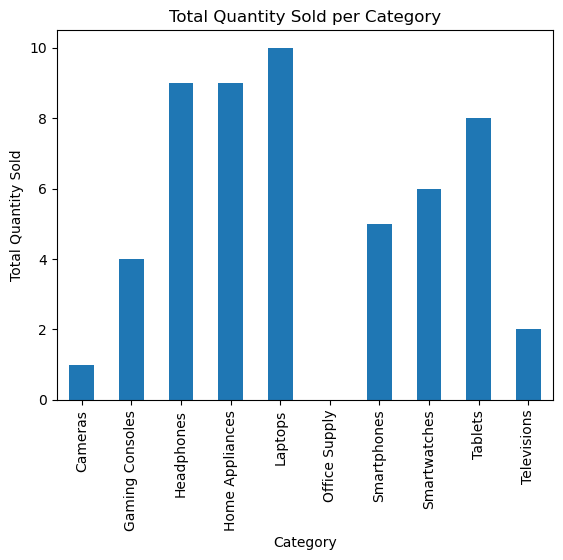

In [140]:
totals = merged.groupby('Category')['Quantity'].sum()
totals.plot(kind = 'bar', title = 'Total Quantity Sold per Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')

2.9 Create a pivot table of the total quantity and the average quantity sold by product and month. The row index should be the product name, and the column index has two layers: The upper layer is the month, and the lower layer is the `TotalQuantity` and `AverageQuantity`. For example, the first column index in the upper layer is `2023-01`. Under `2023-01`, there are two columns named `AverageQuantity` (mean) and `TotalQuantity` (sum). (10 points)

In [143]:
pivot_table = sales.pivot_table(index='ProductID', columns='Month', values='Quantity', aggfunc=['sum', 'mean'])
pivot_table = pivot_table.swaplevel(0, 1, axis=1)
pivot_table = pivot_table.sort_index(axis = 1)
pivot_table.columns = pivot_table.columns.set_levels(['TotalQuantity', 'AverageQuantity'], level=1)
pivot_table = pivot_table.fillna(0) #Just wanted to make it look better
pivot_table

Month           2023-01                       2023-02                
          TotalQuantity AverageQuantity TotalQuantity AverageQuantity
ProductID                                                            
P101                1.5             3.0           0.0             0.0
P102                1.0             2.0           0.0             0.0
P103                1.0             2.0           1.0             1.0
P104                1.0             2.0           0.0             0.0
P105                2.0             4.0           1.0             1.0
P106                1.0             2.0           0.0             0.0
P107                2.0             4.0           0.0             0.0
P108                1.5             3.0           2.0             2.0
P109                1.0             1.0           0.0             0.0
P111                2.0             2.0           1.0             1.0
P112                1.0             1.0           1.0             1.0
P113                2.0             2.0           1.0             1.0
P114                1.0             1.0           1.0             1.0
P115                1.0             1.0           1.0             1.0
P116                2.0             2.0           1.0             1.0
P117                2.0             2.0           1.0             1.0
P118                1.0             1.0           1.0             1.0
P119                3.0             3.0           2.0             2.0
P120                1.0             1.0           1.0             1.0

# 3. Webscrapping: Collect the Emails of all faculty in the STOR department  (20 points)

Use web scrapping technique to collect the email information of all faculty in the UNC STOR department from the webpage: [https://stor.unc.edu/people/faculty/](https://stor.unc.edu/people/faculty/) 


3.1. Create a pd.DataFrame that contains three columns: `faculty_name`, `title` and `email_address`. (10 points)
For example, one row of the dataframe is `Liu, Mo`, `Assistant Professor`, and `Mo_Liu@unc.edu`.



3.2. Notice that in the DataFrame in 3.1, the last name and first name of each person are stored in the same column and separated by `,`. Create two new columns `First_Name` and `Last_Name` that contains the first name and last name seperately. (10 points)

In [21]:
%pip install html5lib
%pip install requests beautifulsoup4 pandas

In [114]:
url = 'https://stor.unc.edu/people/faculty/'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html5lib')

faculty_name = []
titles = []
emails = []


for faculty in soup.find_all('div', class_= 'faculty-holder-strong'):
    try:

        name_tag = faculty.find('a', href= True)
        name = name_tag.text.strip() if name_tag else 'N/A' # Learned from another course


        title_tag = faculty.find_next_sibling('div')
        title = title_tag.text.strip() if title_tag else 'N/A'
        
        
        email_tag = faculty.find('a', href= True)
        
        if email_tag:
            email = email_tag['href'].replace('mailto:', '').strip()
        else:
            email = 'N/A'

        faculty_name.append(name)
        titles.append(title)
        emails.append(email)
        
    except Exception as e:
        print(f"Error processing faculty member: {e}")


df = pd.DataFrame({
    'faculty_name': faculty_name,
    'title': titles,
    'email_address': emails
    })

print(df)

                faculty_name                         title  \
0           Abayomi, Oluremi  Teaching Assistant Professor   
1            Banerjee, Sayan           Associate Professor   
2         Budhiraja, Amarjit                     Professor   
3           Fraiman, Nicolas           Associate Professor   
4                Hannig, Jan                     Professor   
5               Ji, Chuanshu           Associate Professor   
6        Kulkarni, Vidyadhar                     Professor   
7                    Li, Yao           Assistant Professor   
8                    Liu, Mo           Assistant Professor   
9      Marron, J. S. (Steve)       Distinguished Professor   
10      Mohammad Nezhad, Ali           Assistant Professor   
11          O'Neill, Michael           Assistant Professor   
12             Pataki, Gabor                     Professor   
13               Seeger, Ben           Assistant Professor   
14           Tran-Dinh, Quoc           Associate Professor   
15      

In [115]:
df[['Last_Name', 'First_Name']] = df['faculty_name'].str.split(', ', expand=True)
df

,faculty_name,title,email_address,Last_Name,First_Name
0,"Abayomi, Oluremi",Teaching Assistant Professor,https://stor.unc.edu/faculty-member/abayomi-ol...,Abayomi,Oluremi
1,"Banerjee, Sayan",Associate Professor,https://stor.unc.edu/faculty-member/banerjee-s...,Banerjee,Sayan
2,"Budhiraja, Amarjit",Professor,https://stor.unc.edu/faculty-member/budhiraja-...,Budhiraja,Amarjit
3,"Fraiman, Nicolas",Associate Professor,https://stor.unc.edu/faculty-member/fraiman-ni...,Fraiman,Nicolas
4,"Hannig, Jan",Professor,https://stor.unc.edu/faculty-member/hannig-jan/,Hannig,Jan
5,"Ji, Chuanshu",Associate Professor,https://stor.unc.edu/faculty-member/ji-chuanshu/,Ji,Chuanshu
6,"Kulkarni, Vidyadhar",Professor,https://stor.unc.edu/faculty-member/kulkarni-v...,Kulkarni,Vidyadhar
7,"Li, Yao",Assistant Professor,https://stor.unc.edu/faculty-member/li-yao/,Li,Yao
8,"Liu, Mo",Assistant Professor,https://stor.unc.edu/faculty-member/liu-mo/,Liu,Mo
9,"Marron, J. S. (Steve)",Distinguished Professor,https://stor.unc.edu/faculty-member/marron-james/,Marron,J. S. (Steve)
